In [1]:
import torch 
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(), # convert image to tensor
    # standardise the dimensions of the image to 100x100
    transforms.Resize((100, 100)),
    # normalise the image by setting the mean and std to 0.5
    transforms.Normalize(mean=0.5, std=0.5)
])


train_dataset = datasets.Flowers102(root='../data', split='test', download=True, transform=transform) 
val_dataset = datasets.Flowers102(root='../data', split='val', download=True, transform=transform) 
test_dataset = datasets.Flowers102(root='../data', split='train', download=True, transform=transform) 
# NOTE: Due to a bug with the Flowers102 dataset, the train and test splits are swapped

In [3]:
len(train_dataset), len(val_dataset), len(test_dataset)

(6149, 1020, 1020)

In [4]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [5]:
# labels are already loaded inside the dataset
for i, (inputs, labels) in enumerate(train_dataloader):
    print("Batch", i)
    print("Labels:", labels)
    break

/Users/adrian/miniconda3/envs/sc4001/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Batch 0
Labels: tensor([17, 72,  8, 45, 77, 97, 86, 80, 77, 87, 50, 87, 50, 19, 86, 73, 54, 89,
        74, 40, 45,  7,  0, 58, 50, 27, 33, 82, 46, 89,  8, 71])


Let's visualise the convolution layer outputs

/Users/adrian/miniconda3/envs/sc4001/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([32, 3, 100, 100])


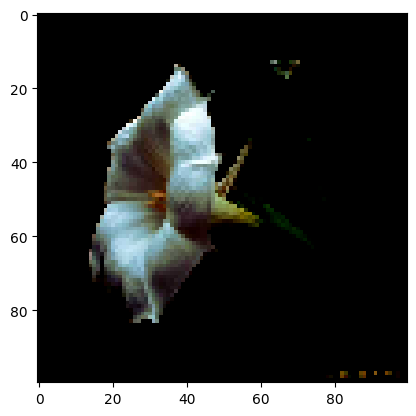

In [6]:
import os
os.chdir("../models")
from model import CustomCNN
import matplotlib.pyplot as plt

# Select random sample
seed = 1
torch.manual_seed(seed)
images, labels = next(iter(train_dataloader))
print(images.shape)
# Transpose the tensor dimensions to (height, width, channels)
img = images[0].permute(1, 2, 0).numpy()
plt.imshow(img)

In [13]:
model = CustomCNN()
conv1, p1, conv2, p2, conv3, p3, conv4, conv5, p5, _ = model(images)
print(conv1.shape, p1.shape, conv2.shape, p2.shape, conv3.shape, p3.shape, conv4.shape, conv5.shape, p5.shape)

Shape before Flatten: torch.Size([32, 512, 5, 5])
Shape after Flatten: torch.Size([32, 12800])
torch.Size([32, 64, 100, 100]) torch.Size([32, 64, 49, 49]) torch.Size([32, 128, 49, 49]) torch.Size([32, 128, 24, 24]) torch.Size([32, 256, 24, 24]) torch.Size([32, 256, 11, 11]) torch.Size([32, 512, 11, 11]) torch.Size([32, 512, 11, 11]) torch.Size([32, 512, 5, 5])


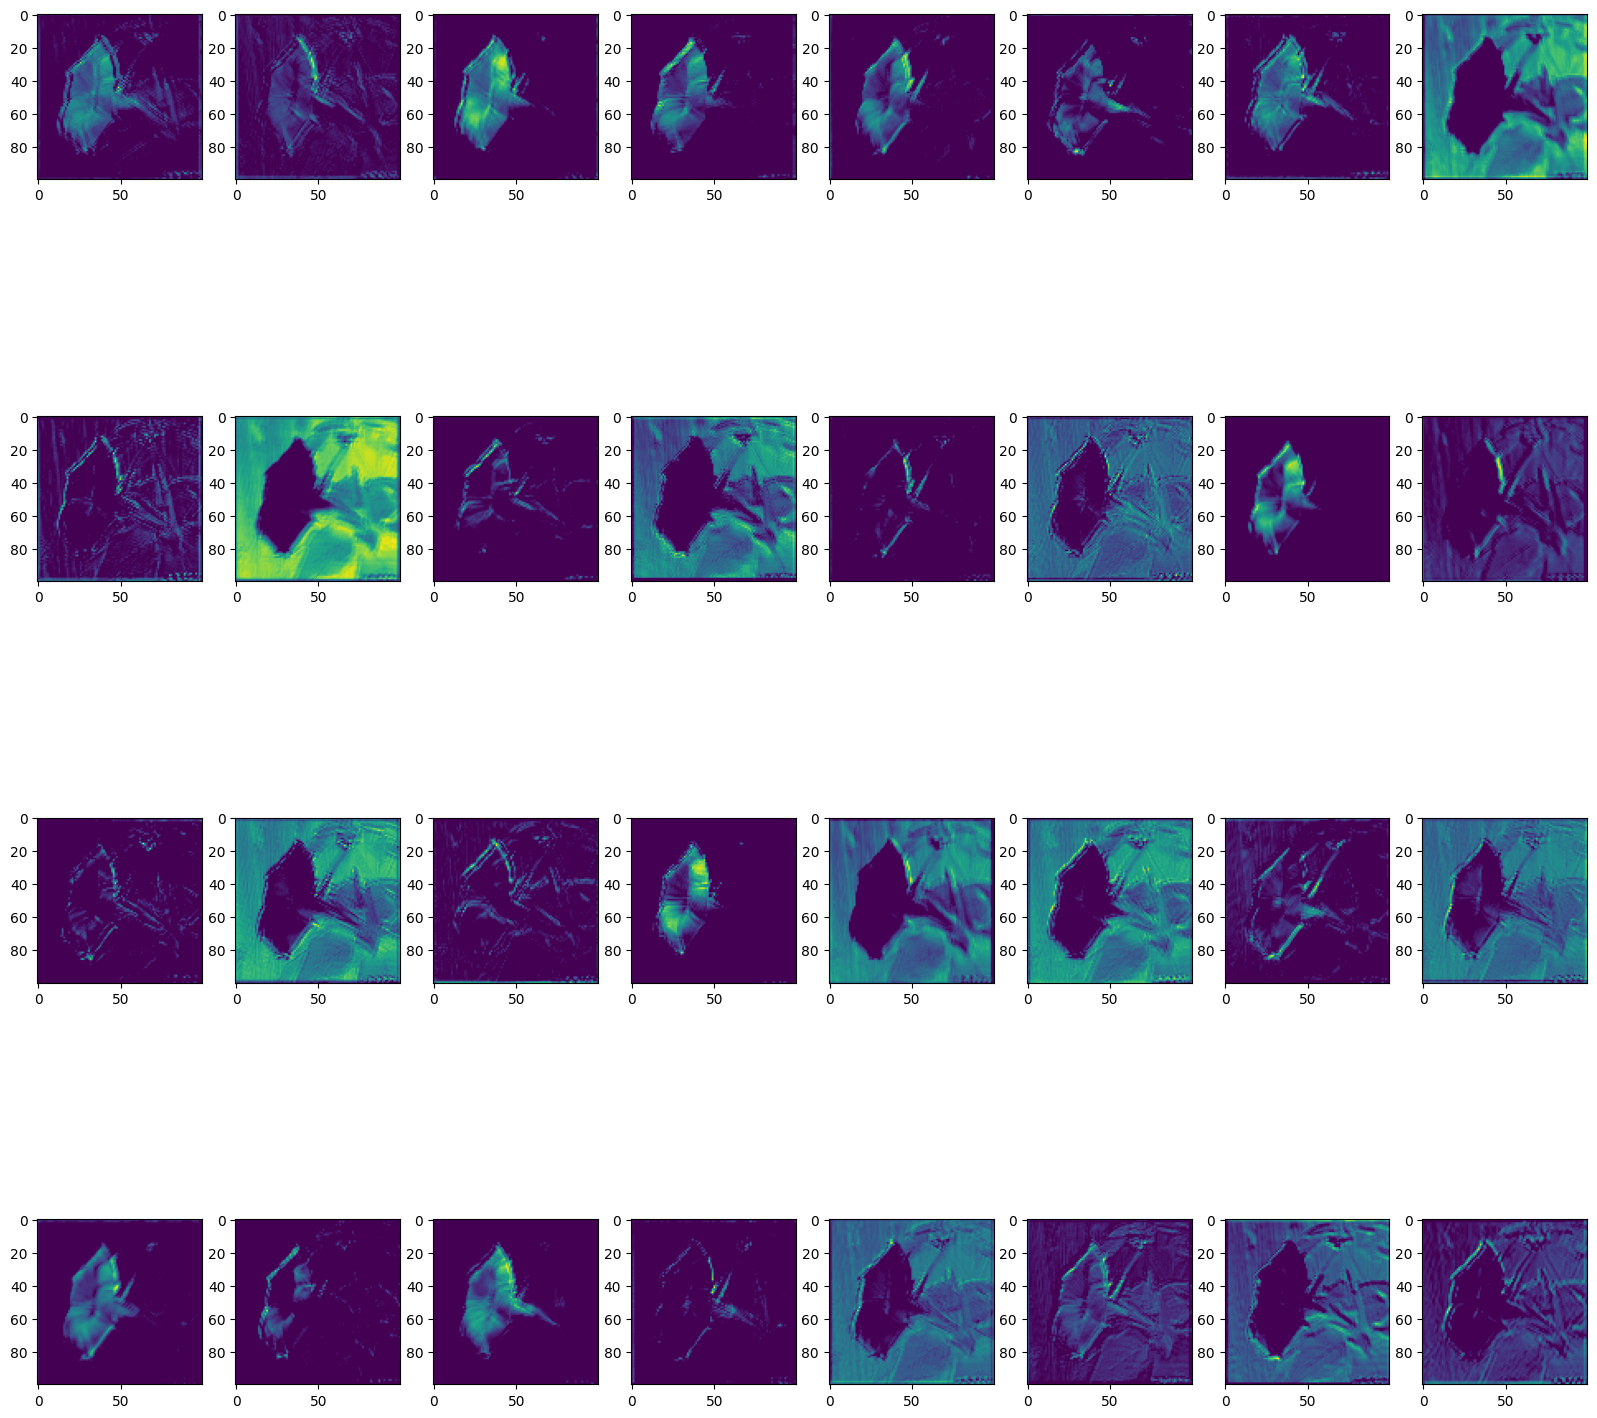

In [14]:
# plot all 32 feature maps for the first convolutional layer
fig = plt.figure(figsize=(20, 20))
for i in range(32):
    ax = fig.add_subplot(4, 8, i+1)
    ax.imshow(conv1[0, i].detach().numpy())
plt.show()

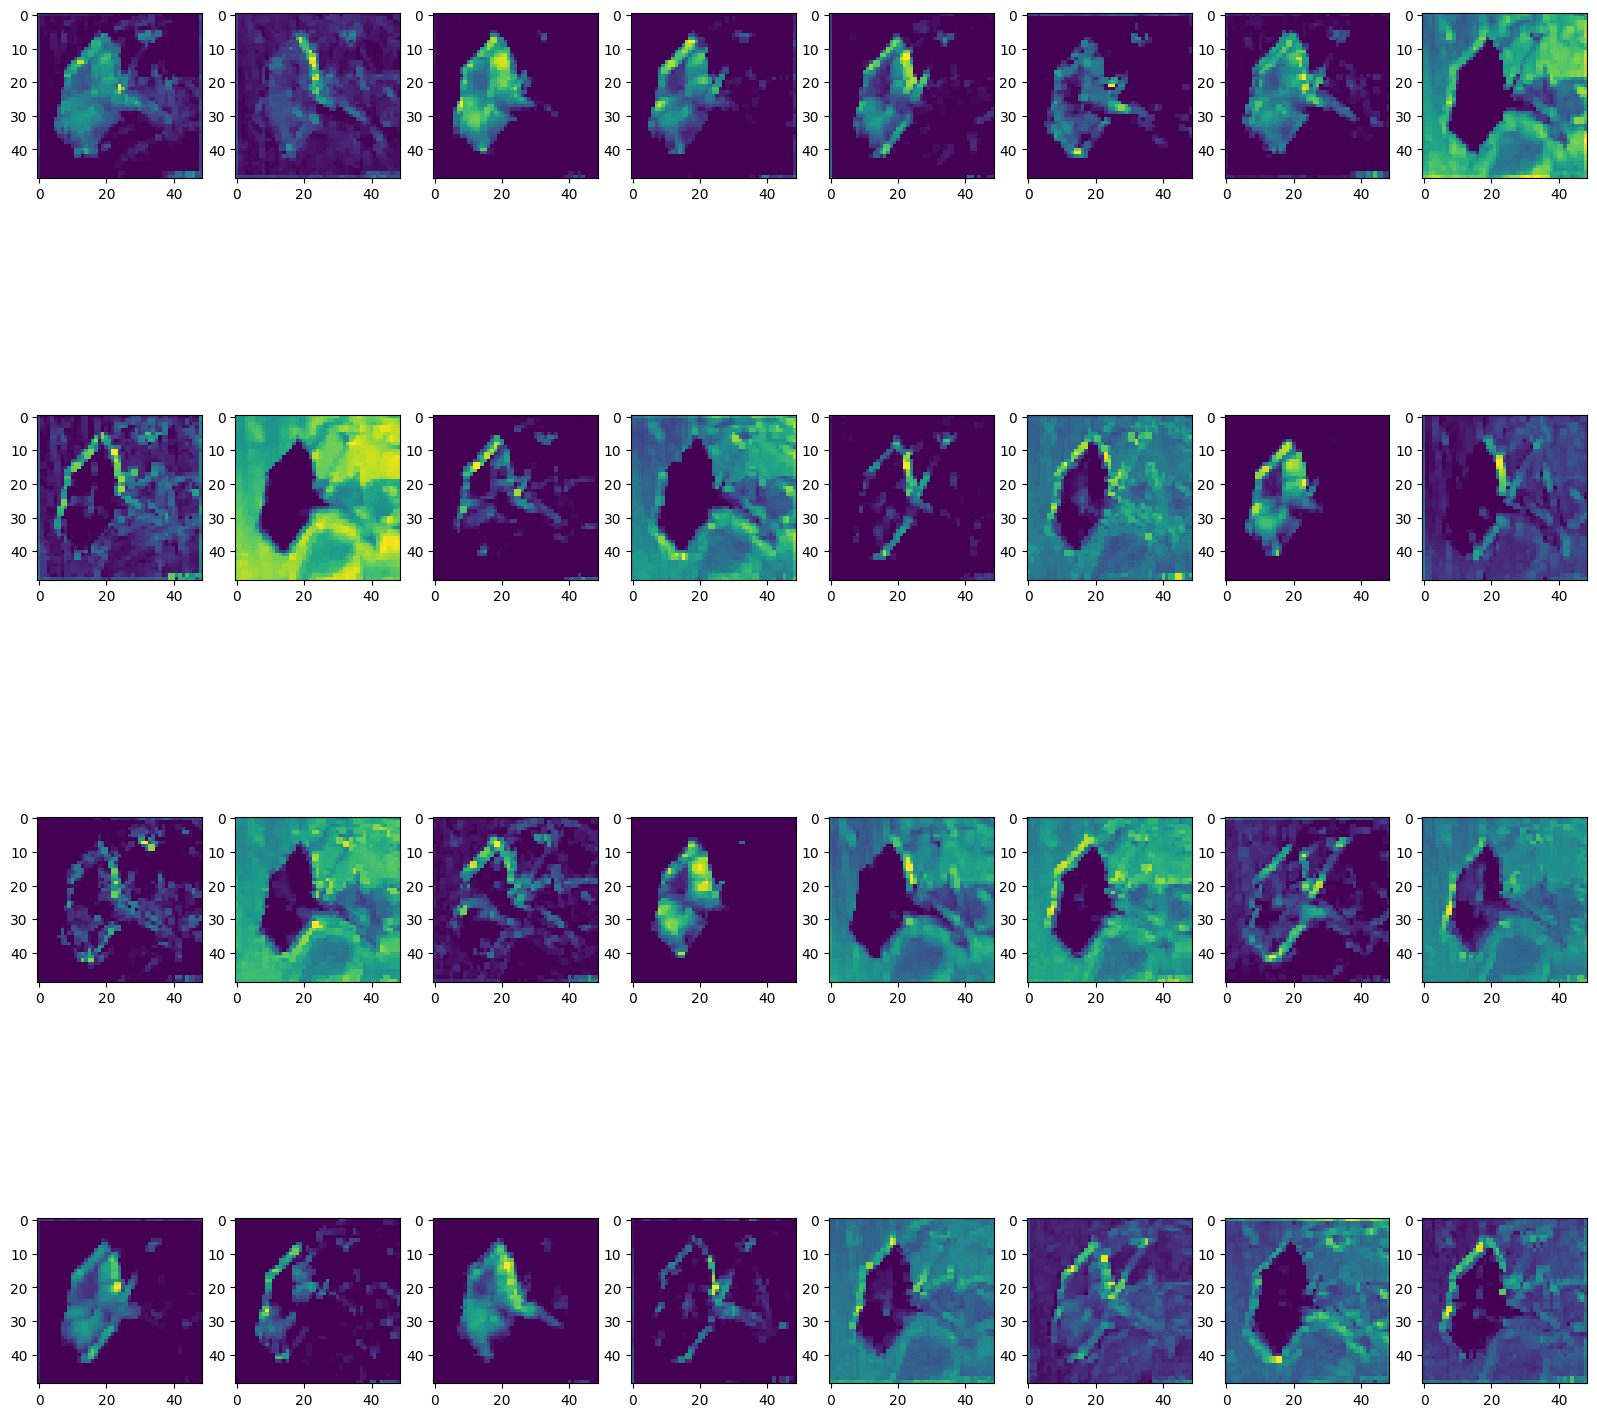

In [15]:
# plot all 32 pooled feature maps for the first convolutional layer
fig = plt.figure(figsize=(20, 20))
for i in range(32):
    ax = fig.add_subplot(4, 8, i+1)
    ax.imshow(p1[0, i].detach().numpy())
plt.show()